## imports

### import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style('whitegrid')

### import data

#### ohlcv_data

In [ ]:
zip_file_list = ['commodity.zip', 'currency.zip', 'famma-french_daily.zip', 'ohlcv_data.zip', 'US_economy.zip']
for zip_file in zip_file_list:
  name = zip_file.split(".")[0]
  with ZipFile(zip_file, 'r') as zip:
    zip.extractall(f'{name}/')
  print('Done')

Done
Done
Done
Done
Done


In [ ]:
# ohlcv 데이터 중 가장 시작 날짜가 늦은 게 무엇인지 알아보자
path = './ohlcv_data/'
ohlcv_file_list = os.listdir(path)
ohlcv_file_list = [file for file in ohlcv_file_list if file.endswith('.csv')]

In [ ]:
# 제일 늦은 것은 2016-03-03 Nikkey225
# 따라서 2016-03-03부터의 데이터를 사용하기로 한다.
# 또한 수익률을 측정해야하기 때문에 pct_change()를 사용해 수익률에 해댱하는 열을 만들어줘야한다.
for file in ohlcv_file_list:
  name = file.split('.')[0]
  df = pd.read_csv(f'ohlcv_data/{file}')
  start_date = df.Date[0]
  print(name, ": ", start_date)

KOSEF국고채10년 :  2011-10-20
TIGER원유선물(H) :  2010-08-02
KBSTAR중기우량회사채 :  2011-04-15
KOSEF미국달러선물 :  2011-02-24
TIGER차이나CSI300 :  2014-02-17
KODEX200 :  2002-10-14
KOSEF미국달러선물인버스 :  2011-04-01
KINDEX일본Nikkey225(H) :  2016-03-03
KOSEF단기자금 :  2010-07-29
TIGER유로스탁스50(H) :  2014-04-30
KODEX골드선물(H) :  2010-10-01
TIGER미국SP500선물(H) :  2011-07-18
TIGER코스닥150 :  2015-11-12
TIGER단기선진하이일드(H) :  2014-03-24
KODEX인버스 :  2009-09-16


In [ ]:
def import_ohlcv_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df = df[df.index % 5 == 0].reset_index(drop=True)      # 주별 수익률을 계산해야하므로 5일을 기준으로 끊어준다.
  df['Rate'] = df['Close'].pct_change()             # 수익률을 반영하는 열 만들기
  df.fillna(0,inplace=True)                         # 맨 처음 수익률은 0
  
  return df

In [ ]:
# 데이터 가져오기
KOSEF국고채10년 = import_ohlcv_data('2016-03-03', 'KOSEF국고채10년.csv')
TIGER원유선물 = import_ohlcv_data('2016-03-03', 'TIGER원유선물(H).csv')
KBSTAR중기우량회사채 = import_ohlcv_data('2016-03-03', 'KBSTAR중기우량회사채.csv')
KOSEF미국달러선물 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물.csv')
TIGER차이나CSI300 = import_ohlcv_data('2016-03-03', 'TIGER차이나CSI300.csv')
KODEX200 = import_ohlcv_data('2016-03-03', 'KODEX200.csv')
KOSEF미국달러선물인버스 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물인버스.csv')
KINDEX일본Nikkey225 = import_ohlcv_data('2016-03-03', 'KINDEX일본Nikkey225(H).csv')
KOSEF단기자금 = import_ohlcv_data('2016-03-03', 'KOSEF단기자금.csv')
TIGER유로스탁스50 = import_ohlcv_data('2016-03-03', 'TIGER유로스탁스50(H).csv')
KODEX골드선물 = import_ohlcv_data('2016-03-03', 'KODEX골드선물(H).csv')
TIGER미국SP500선물 = import_ohlcv_data('2016-03-03', 'TIGER미국SP500선물(H).csv')
TIGER코스닥150 = import_ohlcv_data('2016-03-03', 'TIGER코스닥150.csv')
TIGER단기선진하이일드 = import_ohlcv_data('2016-03-03', 'TIGER단기선진하이일드(H).csv')
KODEX인버스 = import_ohlcv_data('2016-03-03', 'KODEX인버스.csv')

In [ ]:
KODEX200

,Date,Open,High,Low,Close,Volume,Rate
0,2016-03-03,21209,21231,21169,21240,12589807,0.000000
1,2016-03-10,21263,21519,21245,21424,9241212,0.008663
2,2016-03-17,21576,21786,21562,21613,15704717,0.008822
3,2016-03-24,21615,21690,21536,21635,5130539,0.001018
4,2016-03-31,21869,21874,21677,21748,7079167,0.005223
...,...,...,...,...,...,...,...
301,2022-04-15,35487,35487,35221,35296,6591698,-0.008149
302,2022-04-22,35546,35581,35330,35473,5264447,0.005015
303,2022-04-29,35010,35540,34895,35510,6267371,0.001043
304,2022-05-09,34745,34910,34505,34555,7164200,-0.026894


#### famma-french_daily

In [ ]:
path = './famma-french_daily/'
ff_file_list = os.listdir(path)
ff_file_list = [file for file in ff_file_list if file.endswith('.csv')]

In [ ]:
pd.read_csv('famma-french_daily/Japan_5_Factors_Daily.csv')

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,2000-01-03,1.03,0.00,0.00,0.00,0.00,0.02
1,2000-01-04,-1.77,0.11,0.44,-0.33,0.05,0.02
2,2000-01-05,-4.76,1.92,3.42,-1.94,3.16,0.02
3,2000-01-06,-3.52,0.65,2.36,-2.37,2.04,0.02
4,2000-01-07,-0.81,-0.14,1.46,-1.25,2.14,0.02
...,...,...,...,...,...,...,...
5820,2022-04-25,-1.12,0.21,0.03,0.19,0.02,0.00
5821,2022-04-26,0.85,0.51,-1.22,0.65,-0.40,0.00
5822,2022-04-27,-1.80,0.25,-0.57,0.54,-0.34,0.00
5823,2022-04-28,0.08,-0.17,2.06,-1.31,0.58,0.00


In [ ]:
def import_ff_data(start, file):
  file_path = f'famma-french_daily/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df = df[df.index % 5 == 0].reset_index(drop=True) # 주별로 데이터를 계산해야하므로 5일을 기준으로 끊어준다.
  
  return df

In [ ]:
# 데이터 가져오기
North_America_5_Factors_Daily = import_ff_data('2016-03-03', 'North_America_5_Factors_Daily.csv')
North_America_5_Factors_Daily.columns = ['Date'] + list(pd.DataFrame(North_America_5_Factors_Daily.columns).apply(lambda x: x + '(NA)').iloc[1:,0])

Developed_5_Factors_Daily = import_ff_data('2016-03-03', 'Developed_5_Factors_Daily.csv')
Developed_5_Factors_Daily.columns = ['Date'] + list(pd.DataFrame(Developed_5_Factors_Daily.columns).apply(lambda x: x + '(Developed)').iloc[1:,0])

Japan_5_Factors_Daily = import_ff_data('2016-03-03', 'Japan_5_Factors_Daily.csv')
Japan_5_Factors_Daily.columns = ['Date'] + list(pd.DataFrame(Japan_5_Factors_Daily.columns).apply(lambda x: x + '(JP)').iloc[1:,0])

Europe_5_Factors_Daily = import_ff_data('2016-03-03', 'Europe_5_Factors_Daily.csv')
Europe_5_Factors_Daily.columns = ['Date'] + list(pd.DataFrame(Europe_5_Factors_Daily.columns).apply(lambda x: x + '(EU)').iloc[1:,0])

Asia_Pacific_ex_Japan_5_Factors_Daily = import_ff_data('2016-03-03', 'Asia_Pacific_ex_Japan_5_Factors_Daily.csv')
Asia_Pacific_ex_Japan_5_Factors_Daily.columns = ['Date'] + list(pd.DataFrame(Asia_Pacific_ex_Japan_5_Factors_Daily.columns).apply(lambda x: x + '(AP)').iloc[1:,0])

Developed_ex_US_5_Factors_Daily = import_ff_data('2016-03-03', 'Developed_ex_US_5_Factors_Daily.csv')
Developed_ex_US_5_Factors_Daily.columns = ['Date'] + list(pd.DataFrame(Developed_ex_US_5_Factors_Daily.columns).apply(lambda x: x + '(ex_US)').iloc[1:,0])

In [ ]:
Asia_Pacific_ex_Japan_5_Factors_Daily

,Date,Mkt-RF(AP),SMB(AP),HML(AP),RMW(AP),CMA(AP),RF(AP)
0,2016-03-03,1.30,-0.21,0.15,0.55,0.14,0.0
1,2016-03-10,-0.15,0.12,0.27,-0.10,-0.12,0.0
2,2016-03-17,1.64,-0.31,0.15,0.31,0.31,0.0
3,2016-03-24,-1.05,0.45,-0.47,-0.06,0.11,0.0
4,2016-03-31,0.42,-0.04,-0.84,0.57,0.09,0.0
...,...,...,...,...,...,...,...
317,2022-03-31,-0.79,1.03,-0.35,0.20,0.02,0.0
318,2022-04-07,-1.06,0.08,0.92,0.15,0.41,0.0
319,2022-04-14,0.34,0.07,-0.10,-0.04,0.40,0.0
320,2022-04-21,-0.63,-0.28,0.95,0.04,0.28,0.0


#### currency 

In [ ]:
Currency = pd.read_csv('currency/Currency.csv')
Currency = Currency[Currency.Date >= '2016-03-03'].reset_index(drop=True) # 시작하는 날짜보다 뒤에 있는 것만 가져오기
Currency = Currency[Currency.index % 5 == 0].reset_index(drop=True) # 주별로 데이터를 계산해야하므로 5일을 기준으로 끊어준다.

In [ ]:
currency_list = ['USD', 'JPY', 'CNY', 'EUR']  # 환율 마다 스케일이 다르기 때문에 환율의 변화율로 보는 것이 더 적합하다.
for currency in currency_list:                # 따라서 환율의 변화율을 변수로 설정해주도록 한다.
  col = currency + ' Change'
  Currency[col] = Currency[currency].pct_change()

Currency.drop(currency_list, axis=1, inplace=True)
Currency.fillna(0, inplace=True)

In [ ]:
Currency.head()

,Date,USD Change,JPY Change,CNY Change,EUR Change
0,2016-03-03,0.000000,0.000000,0.000000,0.000000
1,2016-03-10,-0.005470,-0.000497,-0.001455,0.014862
2,2016-03-17,-0.041893,-0.026979,-0.037399,-0.030201
3,2016-03-24,0.011784,-0.001842,0.005606,-0.001186
4,2016-03-31,-0.020179,-0.017305,-0.010202,-0.002114


#### Commodity

In [ ]:
path = './commodity/'
commodity_file_list = os.listdir(path)
commodity_file_list = [file for file in commodity_file_list if file.endswith('.csv')]

In [ ]:
def import_commodity_data(start, file):
  file_path = f'commodity/{file}'  # 파일 불러오기
  name = file.split('.')[0]
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df = df[df.index % 5 == 0].reset_index(drop=True) # 주별로 데이터를 계산해야하므로 5일을 기준으로 끊어준다.
  df = df.iloc[:,:2]                                # Date를 뺀 가장 첫번째 열이 모두 가격을 나타내므로 이것만을 사용하기로 한다
  df.columns = ['Date', f'{name} Price']                    # 열 이름을 똑같이 변경
  return df

In [ ]:
gold = import_commodity_data('2016-03-03', 'gold.csv')
silver = import_commodity_data('2016-03-03', 'silver.csv')
natural_gas = import_commodity_data('2016-03-03', 'natural_gas.csv')
oil = import_commodity_data('2016-03-03', 'oil.csv')

In [ ]:
gold

,Date,gold Price
0,2016-03-03,1241.95
1,2016-03-10,1247.25
2,2016-03-17,1269.60
3,2016-03-24,1216.45
4,2016-04-04,1215.00
...,...,...
309,2022-04-12,1951.40
310,2022-04-21,1945.95
311,2022-04-28,1890.00
312,2022-05-06,1884.30


#### US_economy

##### fed_rate

In [ ]:
fed_rate = pd.read_csv('US_economy/FED_rate.csv')

In [ ]:
fed_rate = fed_rate[fed_rate.Date >= "2016-03-03"].reset_index(drop=True)
fed_rate.fillna(method='ffill', inplace=True)
fed_rate = fed_rate[fed_rate.index % 5 == 0].reset_index(drop=True)
fed_rate.columns = ['Date', 'fed_rate']

In [ ]:
fed_rate.tail()

,Date,fed_rate
319,2022-04-14,0.5
320,2022-04-21,0.5
321,2022-04-28,0.5
322,2022-05-05,1.0
323,2022-05-12,1.0


##### US_base_rate

In [ ]:
US_base_rate = pd.read_csv('US_economy/US_base_rate.csv')

In [ ]:
US_base_rate.Date = pd.date_range('2000-01-01', periods=268, freq='M')
US_base_rate = US_base_rate[US_base_rate.Date >= "2016-02-28"].reset_index(drop=True)
US_base_rate.head()

,Date,미국정책금리
0,2016-02-29,0.4
1,2016-03-31,0.4
2,2016-04-30,0.4
3,2016-05-31,0.4
4,2016-06-30,0.4


In [ ]:
date_df = pd.DataFrame(pd.to_datetime(fed_rate.Date))
date_df.head()

,Date
0,2016-03-03
1,2016-03-10
2,2016-03-17
3,2016-03-24
4,2016-03-31


In [ ]:
merged_df = pd.merge(US_base_rate, date_df, left_on='Date', right_on='Date', how='right')
merged_df.fillna(method='ffill', inplace=True)
merged_df.fillna(0.4, inplace=True)
merged_df

,Date,미국정책금리
0,2016-03-03,0.4
1,2016-03-10,0.4
2,2016-03-17,0.4
3,2016-03-24,0.4
4,2016-03-31,0.4
...,...,...
319,2022-04-14,0.4
320,2022-04-21,0.4
321,2022-04-28,0.4
322,2022-05-05,0.4


In [ ]:
merged_df.columns = ['Date', 'Base_rate']
US_base_rate = merged_df
US_base_rate.Date = fed_rate.Date
US_base_rate

,Date,Base_rate
0,2016-03-03,0.4
1,2016-03-10,0.4
2,2016-03-17,0.4
3,2016-03-24,0.4
4,2016-03-31,0.4
...,...,...
319,2022-04-14,0.4
320,2022-04-21,0.4
321,2022-04-28,0.4
322,2022-05-05,0.4


##### US_economic_growth_rate

In [ ]:
US_economic_growth_rate = pd.read_csv('US_economy/US_economic_growth_rate.csv')

In [ ]:
US_economic_growth_rate.Date = US_economic_growth_rate.Date.apply(lambda x: x + '-03')
US_economic_growth_rate = US_economic_growth_rate[US_economic_growth_rate.Date >= "2016-03-03"].reset_index(drop=True)
US_economic_growth_rate.Date = pd.to_datetime(US_economic_growth_rate.Date)

In [ ]:
US_economic_growth_rate.tail()

,Date,미국경제성장률
20,2021-03-03,1.5
21,2021-06-03,1.6
22,2021-09-03,0.6
23,2021-12-03,1.7
24,2022-03-03,-0.4


In [ ]:
merged_df = pd.merge(US_economic_growth_rate, date_df, left_on='Date', right_on='Date', how='right')
merged_df.fillna(method='ffill', inplace=True)
merged_df

,Date,미국경제성장률
0,2016-03-03,0.6
1,2016-03-10,0.6
2,2016-03-17,0.6
3,2016-03-24,0.6
4,2016-03-31,0.6
...,...,...
319,2022-04-14,-0.4
320,2022-04-21,-0.4
321,2022-04-28,-0.4
322,2022-05-05,-0.4


In [ ]:
merged_df.columns = ['Date', 'growth_rate']
US_economic_growth_rate = merged_df
US_economic_growth_rate.Date = fed_rate.Date
US_economic_growth_rate

,Date,growth_rate
0,2016-03-03,0.6
1,2016-03-10,0.6
2,2016-03-17,0.6
3,2016-03-24,0.6
4,2016-03-31,0.6
...,...,...
319,2022-04-14,-0.4
320,2022-04-21,-0.4
321,2022-04-28,-0.4
322,2022-05-05,-0.4


## Make Model

### preparation

In [ ]:
print(ohlcv_file_list)
print(commodity_file_list)
print(ff_file_list)
print(['Currency','fed_rate', 'US_economic_growth_rate', 'US_base_rate'])

['KOSEF국고채10년.csv', 'TIGER원유선물(H).csv', 'KBSTAR중기우량회사채.csv', 'KOSEF미국달러선물.csv', 'TIGER차이나CSI300.csv', 'KODEX200.csv', 'KOSEF미국달러선물인버스.csv', 'KINDEX일본Nikkey225(H).csv', 'KOSEF단기자금.csv', 'TIGER유로스탁스50(H).csv', 'KODEX골드선물(H).csv', 'TIGER미국SP500선물(H).csv', 'TIGER코스닥150.csv', 'TIGER단기선진하이일드(H).csv', 'KODEX인버스.csv']
['gold.csv', 'natural_gas.csv', 'oil.csv', 'silver.csv']
['North_America_5_Factors_Daily.csv', 'Developed_5_Factors_Daily.csv', 'Japan_5_Factors_Daily.csv', 'Europe_5_Factors_Daily.csv', 'Asia_Pacific_ex_Japan_5_Factors_Daily.csv', 'Developed_ex_US_5_Factors_Daily.csv']
['Currency', 'fed_rate', 'US_economic_growth_rate', 'US_base_rate']


In [ ]:
ohlcv_list = [KOSEF국고채10년, 
 TIGER원유선물,
 KBSTAR중기우량회사채,
 KOSEF미국달러선물,
 TIGER차이나CSI300,
 KODEX200,
 KOSEF미국달러선물인버스,
 KINDEX일본Nikkey225,
 KOSEF단기자금,
 TIGER유로스탁스50,
 KODEX골드선물,
 TIGER미국SP500선물,
 TIGER코스닥150,
 TIGER단기선진하이일드,
 KODEX인버스]
commodity_list = [gold, natural_gas, oil, silver]
ff_list = [North_America_5_Factors_Daily, Developed_5_Factors_Daily, Japan_5_Factors_Daily, Europe_5_Factors_Daily, Asia_Pacific_ex_Japan_5_Factors_Daily, Developed_ex_US_5_Factors_Daily]
economy_list = [Currency, fed_rate, US_economic_growth_rate, US_base_rate]
total_feature_list = commodity_list + ff_list +economy_list

In [ ]:
def merge_data_set(dataset, feature_list):
  df = dataset
  for feature in feature_list:
    df = pd.merge(df, feature, how='left')
  df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']] = df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']].fillna(0)
  df = df.fillna(method='ffill')
  df = df.iloc[1:,].reset_index(drop=True) #첫열의 경우 수익률이 제대로 측정되지 않기 때문에
  return df

### KODEX200

In [ ]:
feature_list = total_feature_list
KODEX200_combined = merge_data_set(KODEX200, feature_list)
KODEX200_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,21263,21519,21245,21424,9241212,0.008663,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,21576,21786,21562,21613,15704717,0.008822,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,21615,21690,21536,21635,5130539,0.001018,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,21869,21874,21677,21748,7079167,0.005223,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,21481,21520,21326,21420,3743349,-0.015082,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of KODEX200_combined: {KODEX200_combined.shape}")
KODEX200_combined.info()

shape of KODEX200_combined: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    f

In [ ]:
KODEX200_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
KODEX200_combined_scaled = scaler.fit_transform(KODEX200_combined)
KODEX200_combined_scaled

array([[0.08962225, 0.07076646, 0.09050551, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.10273055, 0.0822247 , 0.10378188, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.10436385, 0.07810488, 0.10269297, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.66534048, 0.67247447, 0.66218537, ..., 0.        , 0.        ,
        0.        ],
       [0.6542424 , 0.64543816, 0.64585166, ..., 0.        , 0.        ,
        0.        ],
       [0.65863975, 0.64608188, 0.64124471, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# make_windowed_dataset
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(len(dataset)-time_step+1):
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
time_step = 10
X = make_windowed_dataset(KODEX200_combined_scaled,time_step)
y = KODEX200_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
import tensorflow as tf
from keras import activations
from keras.layers import Dense, Dropout,SimpleRNN, LSTM, BatchNormalization
from keras.models import Sequential 
from keras.layers import Dense 
from tensorflow.keras.optimizers import Adam
tf.random.set_seed(42)

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
# value는 numpy array 형태의 값들의 모음이다
def min_max_inverse_transform(data, value):
  min, max = data.min(), data.max()
  new_value = value * max + min
  return new_value

In [ ]:
# 1% 정도의 RMSE가 나오는 것을 확인할 수 있다.
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(KODEX200.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(KODEX200.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

0.00011956170673292204


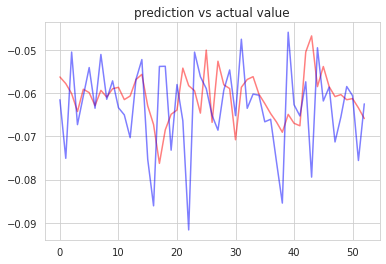

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### KODEX 인버스(진행하지 않음)

In [ ]:
# KODEX인버스의 경우, KODEX200과 반대로 움직이기 떄문에 굳이 진행을 하지 않았다.

### TIGER코스닥150

In [ ]:
feature_list = total_feature_list
TIGER코스닥150_combined = merge_data_set(TIGER코스닥150, feature_list)
TIGER코스닥150_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,10461,10498,10408,10489,423083,0.010209,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,10470,10503,10404,10423,917870,-0.006292,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,10384,10408,10282,10323,413984,-0.009594,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,10312,10317,10221,10279,405911,-0.004262,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,10437,10475,10389,10475,403562,0.019068,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of TIGER코스닥150: {TIGER코스닥150_combined.shape}")
TIGER코스닥150_combined.info()

shape of TIGER코스닥150: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    float64

In [ ]:
TIGER코스닥150_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
TIGER코스닥150_combined_scaled = scaler.fit_transform(TIGER코스닥150_combined)
TIGER코스닥150_combined_scaled

array([[0.35033837, 0.31200175, 0.3520034 , ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.35127538, 0.31254778, 0.35157828, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.34232171, 0.3021732 , 0.33861197, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.56366476, 0.56066397, 0.56902965, ..., 0.        , 0.        ,
        0.        ],
       [0.54752733, 0.51479742, 0.52704857, ..., 0.        , 0.        ,
        0.        ],
       [0.54700677, 0.51752757, 0.53501966, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(TIGER코스닥150_combined_scaled,time_step)
y = TIGER코스닥150_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
# 1% 정도의 RMSE가 나오는 것을 확인할 수 있다.
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(TIGER코스닥150.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(TIGER코스닥150.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

0.0005334995841188334


No handles with labels found to put in legend.


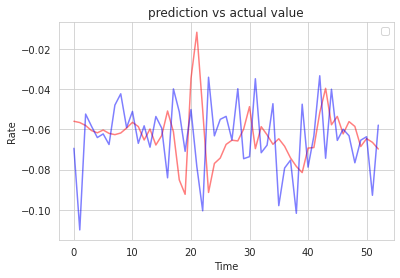

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### KINDEX일본Nikkey225

In [ ]:
feature_list = total_feature_list
KINDEX일본Nikkey225_combined = merge_data_set(KINDEX일본Nikkey225, feature_list)
KINDEX일본Nikkey225_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,10425,10480,10370,10480,310932,-0.003802,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,10640,10690,10405,10455,298098,-0.002385,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,10505,10505,10435,10495,335721,0.003826,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,10995,10995,10470,10470,318498,-0.002382,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,9740,9860,9740,9815,833,-0.062560,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of KINDEX일본Nikkey225: {KINDEX일본Nikkey225_combined.shape}")
KINDEX일본Nikkey225_combined.info()

shape of KINDEX일본Nikkey225: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    f

In [ ]:
KINDEX일본Nikkey225_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
KINDEX일본Nikkey225_combined_scaled = scaler.fit_transform(KINDEX일본Nikkey225_combined)
KINDEX일본Nikkey225_combined_scaled

array([[0.08221154, 0.08313426, 0.0890179 , ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.10288462, 0.10320115, 0.09240445, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.08990385, 0.08552317, 0.09530721, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.8       , 0.81127568, 0.80212869, ..., 0.        , 0.        ,
        0.        ],
       [0.77644231, 0.76779742, 0.74358974, ..., 0.        , 0.        ,
        0.        ],
       [0.775     , 0.7682752 , 0.77261732, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(KINDEX일본Nikkey225_combined_scaled,time_step)
y = KINDEX일본Nikkey225_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
# 1% 정도의 RMSE가 나오는 것을 확인할 수 있다.
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(KINDEX일본Nikkey225.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(KINDEX일본Nikkey225.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

0.0001770518176573931


No handles with labels found to put in legend.


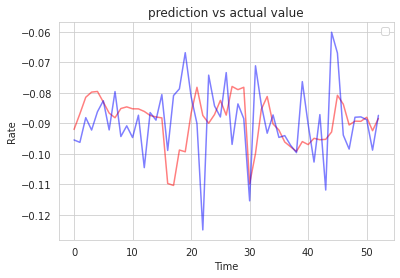

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### TIGER차이나CSI300

In [ ]:
feature_list = total_feature_list
TIGER차이나CSI300_combined = merge_data_set(TIGER차이나CSI300, feature_list)
TIGER차이나CSI300_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,6827,6889,6789,6810,491465,-0.001320,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,6793,6832,6741,6791,531585,-0.002790,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,6977,7078,6926,6961,515997,0.025033,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,6972,7035,6906,6909,555417,-0.007470,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,7007,7049,6906,6976,533597,0.009697,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of TIGER차이나CSI300: {TIGER차이나CSI300_combined.shape}")
TIGER차이나CSI300_combined.info()

shape of TIGER차이나CSI300: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    floa

In [ ]:
TIGER차이나CSI300_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
TIGER차이나CSI300_combined_scaled = scaler.fit_transform(TIGER차이나CSI300_combined)
TIGER차이나CSI300_combined_scaled

array([[0.08992967, 0.09314015, 0.09436788, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.08484214, 0.08471319, 0.08717795, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.11237468, 0.1210822 , 0.11488916, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.55573844, 0.58929627, 0.54388856, ..., 0.        , 0.        ,
        0.        ],
       [0.51982643, 0.52054997, 0.51617735, ..., 0.        , 0.        ,
        0.        ],
       [0.56322011, 0.55159669, 0.55512283, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(TIGER차이나CSI300_combined_scaled,time_step)
y = TIGER차이나CSI300_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
# 1% 정도의 RMSE가 나오는 것을 확인할 수 있다.
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(TIGER차이나CSI300.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(TIGER차이나CSI300.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

0.00021096767916660178


No handles with labels found to put in legend.


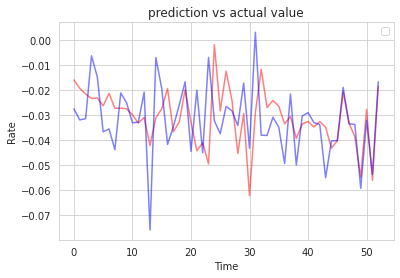

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### TIGER유로스탁스50

In [ ]:
feature_list = total_feature_list
TIGER유로스탁스50_combined = merge_data_set(TIGER유로스탁스50, feature_list)
TIGER유로스탁스50_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,9665,9675,9590,9590,5708,-0.010320,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,9810,9895,9810,9885,111333,0.030761,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,9750,9860,9645,9725,2418,-0.016186,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,9755,9755,9675,9730,5258,0.000514,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,9340,9340,9285,9325,5267,-0.041624,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of TIGER유로스탁스50: {TIGER유로스탁스50_combined.shape}")
TIGER유로스탁스50_combined.info()

shape of TIGER유로스탁스50: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    float6

In [ ]:
TIGER유로스탁스50_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
TIGER유로스탁스50_combined_scaled = scaler.fit_transform(TIGER유로스탁스50_combined)
TIGER유로스탁스50_combined_scaled

array([[0.22017673, 0.19274376, 0.24631579, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.24153166, 0.22600151, 0.27719298, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.23269514, 0.22071051, 0.25403509, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.69661267, 0.70521542, 0.7045614 , ..., 0.        , 0.        ,
        0.        ],
       [0.60972018, 0.61451247, 0.62315789, ..., 0.        , 0.        ,
        0.        ],
       [0.68041237, 0.67724868, 0.67368421, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(TIGER유로스탁스50_combined_scaled,time_step)
y = TIGER유로스탁스50_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
# 1% 정도의 RMSE가 나오는 것을 확인할 수 있다.
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(TIGER유로스탁스50.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(TIGER유로스탁스50.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

8.00252669154149e-05


No handles with labels found to put in legend.


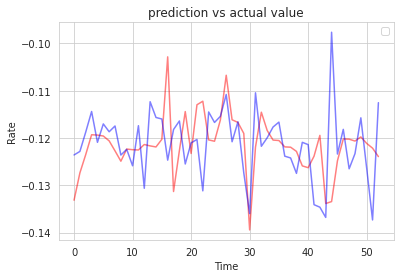

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### TIGER미국SP500선물

In [ ]:
feature_list = total_feature_list
TIGER미국SP500선물_combined = merge_data_set(TIGER미국SP500선물, feature_list)
TIGER미국SP500선물_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,23255,23255,23255,23255,10555,0.003452,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,23600,23740,23600,23660,40743,0.017416,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,23780,23780,23650,23700,8688,0.001691,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,24000,24035,23975,24020,4040,0.013502,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,24120,24150,24035,24085,8801,0.002706,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of TIGER미국SP500선물: {TIGER미국SP500선물_combined.shape}")
TIGER미국SP500선물_combined.info()

shape of TIGER미국SP500선물: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    floa

In [ ]:
TIGER미국SP500선물_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
TIGER미국SP500선물_combined_scaled = scaler.fit_transform(TIGER미국SP500선물_combined)
TIGER미국SP500선물_combined_scaled

array([[0.        , 0.        , 0.00470981, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.01051188, 0.01475285, 0.01519295, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.01599634, 0.01596958, 0.01671225, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.81276661, 0.82190114, 0.81449407, ..., 0.        , 0.        ,
        0.        ],
       [0.75426569, 0.75391635, 0.74901246, ..., 0.        , 0.        ,
        0.        ],
       [0.73644119, 0.73536122, 0.72151322, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(TIGER미국SP500선물_combined_scaled,time_step)
y = TIGER미국SP500선물_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
# 1% 정도의 RMSE가 나오는 것을 확인할 수 있다.
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(TIGER미국SP500선물.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(TIGER미국SP500선물.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

0.00016184282222865865


No handles with labels found to put in legend.


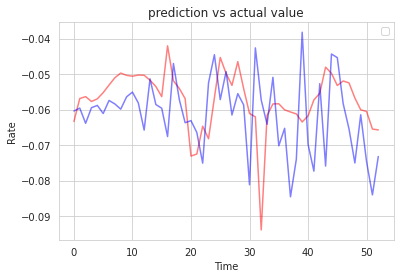

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### KOSEF국고채10년

In [ ]:
feature_list = total_feature_list
KOSEF국고채10년_combined = merge_data_set(KOSEF국고채10년, feature_list)
KOSEF국고채10년_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,111060,111060,110778,111026,762,-0.000405,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,110847,110976,110838,110980,3380,-0.000414,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,111176,111352,111176,111262,525,0.002541,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,111946,111946,111590,111814,732,0.004961,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,111655,111794,111655,111697,317,-0.001046,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of KOSEF국고채10년: {KOSEF국고채10년_combined.shape}")
KOSEF국고채10년_combined.info()

shape of KOSEF국고채10년: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    float64

In [ ]:
KOSEF국고채10년_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
KOSEF국고채10년_combined_scaled = scaler.fit_transform(KOSEF국고채10년_combined)
KOSEF국고채10년_combined_scaled

array([[0.21919177, 0.20826295, 0.22012322, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.20905326, 0.2042087 , 0.22317837, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.22471322, 0.22235629, 0.24038902, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.23466134, 0.23504995, 0.23804674, ..., 0.        , 0.        ,
        0.        ],
       [0.14898377, 0.1474492 , 0.11685931, ..., 0.        , 0.        ,
        0.        ],
       [0.20872007, 0.23432598, 0.20927746, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(KOSEF국고채10년_combined_scaled,time_step)
y = KOSEF국고채10년_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(KOSEF국고채10년.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(KOSEF국고채10년.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

5.1069792456031675e-06


No handles with labels found to put in legend.


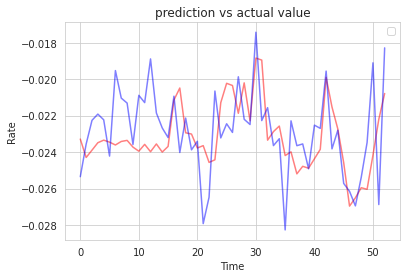

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### KBSTAR중기우량회사채

In [ ]:
feature_list = total_feature_list
KBSTAR중기우량회사채_combined = merge_data_set(KBSTAR중기우량회사채, feature_list)
KBSTAR중기우량회사채_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,94077,94234,94077,94243,55,0.000159,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,94007,94204,94007,94211,50,-0.000340,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,94302,94307,94302,94318,20,0.001136,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,94411,94438,94411,94442,220,0.001315,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,94519,94538,94519,94545,22,0.001091,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of KBSTAR중기우량회사채: {KBSTAR중기우량회사채_combined.shape}")
KBSTAR중기우량회사채_combined.info()

shape of KBSTAR중기우량회사채: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    float

In [ ]:
KBSTAR중기우량회사채_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
KBSTAR중기우량회사채_combined_scaled = scaler.fit_transform(KBSTAR중기우량회사채_combined)
KBSTAR중기우량회사채_combined_scaled

array([[0.00603032, 0.002621  , 0.00608273, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.        , 0.        , 0.        , ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.02541351, 0.00899878, 0.02563434, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.72777395, 0.72959986, 0.73279458, ..., 0.        , 0.        ,
        0.        ],
       [0.69805307, 0.70732133, 0.69629823, ..., 0.        , 0.        ,
        0.        ],
       [0.69719159, 0.73615237, 0.70324991, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(KBSTAR중기우량회사채_combined_scaled,time_step)
y = KBSTAR중기우량회사채_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(KBSTAR중기우량회사채.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(KBSTAR중기우량회사채.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

6.685804690566712e-07


No handles with labels found to put in legend.


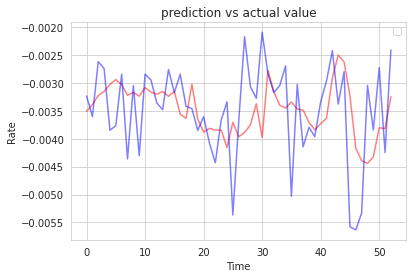

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### TIGER단기선진하이일드

In [ ]:
feature_list = total_feature_list
TIGER단기선진하이일드_combined = merge_data_set(TIGER단기선진하이일드, feature_list)
TIGER단기선진하이일드_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,9555,9555,9555,9555,1,0.006319,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,9605,9605,9605,9605,64,0.005233,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,9655,9655,9655,9655,1,0.005206,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,9625,9625,9625,9625,0,-0.003107,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,9670,9670,9670,9670,0,0.004675,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of TIGER단기선진하이일드: {TIGER단기선진하이일드_combined.shape}")
TIGER단기선진하이일드_combined.info()

shape of TIGER단기선진하이일드: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    float

In [ ]:
TIGER단기선진하이일드_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
TIGER단기선진하이일드_combined_scaled = scaler.fit_transform(TIGER단기선진하이일드_combined)
TIGER단기선진하이일드_combined_scaled

array([[0.        , 0.        , 0.        , ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.01633987, 0.01633987, 0.01650165, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.03267974, 0.03267974, 0.0330033 , ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.83006536, 0.83006536, 0.82508251, ..., 0.        , 0.        ,
        0.        ],
       [0.78921569, 0.78921569, 0.77392739, ..., 0.        , 0.        ,
        0.        ],
       [0.74183007, 0.74836601, 0.74092409, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(TIGER단기선진하이일드_combined_scaled,time_step)
y = TIGER단기선진하이일드_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(TIGER단기선진하이일드.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(TIGER단기선진하이일드.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

5.184762355977917e-06


No handles with labels found to put in legend.


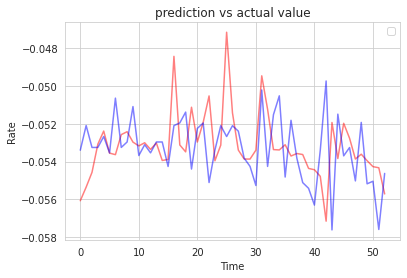

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### KODEX골드선물

In [ ]:
feature_list = total_feature_list
KODEX골드선물_combined = merge_data_set(KODEX골드선물, feature_list)
KODEX골드선물_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,9680,9690,9635,9640,34029,0.007315,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,9720,9740,9685,9720,112485,0.008299,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,9430,9430,9365,9395,63038,-0.033436,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,9465,9490,9450,9490,16604,0.010112,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,9460,9495,9435,9490,18000,0.000000,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of KODEX골드선물: {KODEX골드선물_combined.shape}")
KODEX골드선물_combined.info()

shape of KODEX골드선물: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    float64
 

In [ ]:
KODEX골드선물_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
KODEX골드선물_combined_scaled = scaler.fit_transform(KODEX골드선물_combined)
KODEX골드선물_combined_scaled

array([[0.17998244, 0.176781  , 0.18050542, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.18700615, 0.18557608, 0.18953069, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.13608428, 0.13104661, 0.13176895, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.72256365, 0.7414248 , 0.74638989, ..., 0.        , 0.        ,
        0.        ],
       [0.70412643, 0.70184697, 0.71570397, ..., 0.        , 0.        ,
        0.        ],
       [0.62159789, 0.62269129, 0.63267148, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(KODEX골드선물_combined_scaled,time_step)
y = KODEX골드선물_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(KODEX골드선물.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(KODEX골드선물.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

0.00014752969973993516


No handles with labels found to put in legend.


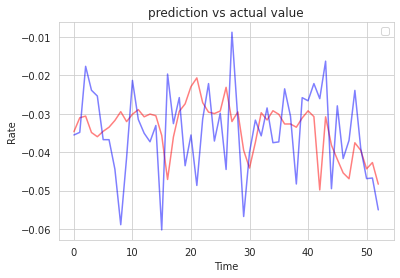

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### TIGER원유선물

In [ ]:
feature_list = total_feature_list
TIGER원유선물_combined = merge_data_set(TIGER원유선물, feature_list)
TIGER원유선물_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,3820,3825,3805,3810,1862786,0.071730,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,3805,3840,3795,3805,2002394,-0.001312,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,3800,3815,3795,3810,954164,0.001314,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,3745,3745,3720,3720,556065,-0.023622,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,3675,3685,3655,3680,943867,-0.010753,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of TIGER원유선물: {TIGER원유선물_combined.shape}")
TIGER원유선물_combined.info()

shape of KODEXTIGER원유선물: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    floa

In [ ]:
TIGER원유선물_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
TIGER원유선물_combined_scaled = scaler.fit_transform(TIGER원유선물_combined)
TIGER원유선물_combined_scaled

array([[0.56285391, 0.5583524 , 0.56442417, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.5594564 , 0.5617849 , 0.56214367, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.5583239 , 0.55606407, 0.56214367, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.88674972, 0.8993135 , 0.88825542, ..., 0.        , 0.        ,
        0.        ],
       [0.92865232, 0.94508009, 0.9281642 , ..., 0.        , 0.        ,
        0.        ],
       [0.93997735, 0.95308924, 0.92246294, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(TIGER원유선물_combined_scaled,time_step)
y = TIGER원유선물_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(TIGER원유선물.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(TIGER원유선물.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

0.0006338845391802026


No handles with labels found to put in legend.


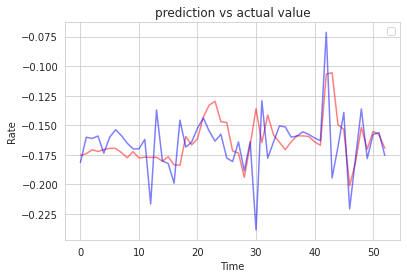

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### KOSEF미국달러선물

In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물_combined = merge_data_set(KOSEF미국달러선물, feature_list)
KOSEF미국달러선물_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,11995,12063,11961,11967,14659,-0.010010,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,11810,11810,11656,11662,314925,-0.025487,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,11607,11627,11559,11585,133160,-0.006603,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,11418,11418,11375,11376,143135,-0.018041,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,11476,11505,11447,11459,107116,0.007296,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of KOSEF미국달러선물: {KOSEF미국달러선물_combined.shape}")
KOSEF미국달러선물_combined.info()

shape of KOSEF미국달러선물: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    float64

In [ ]:
KOSEF미국달러선물_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
KOSEF미국달러선물_combined_scaled = scaler.fit_transform(KOSEF미국달러선물_combined)
KOSEF미국달러선물_combined_scaled

array([[0.46321131, 0.48599491, 0.47864835, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.39615803, 0.39396144, 0.36539176, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.32258065, 0.32739178, 0.32937245, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.93983327, 0.94143325, 0.92016339, ..., 0.        , 0.        ,
        0.        ],
       [0.94345777, 0.96144052, 0.98329001, ..., 0.        , 0.        ,
        0.        ],
       [0.95976803, 0.99963623, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(KOSEF미국달러선물_combined_scaled,time_step)
y = KOSEF미국달러선물_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(KOSEF미국달러선물.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(KOSEF미국달러선물.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

3.2497389511020454e-05


No handles with labels found to put in legend.


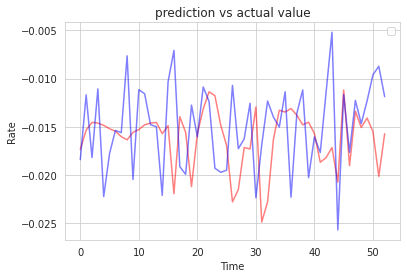

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

### KOSEF미국달러선물(진행하지않음)

In [ ]:
#### KOSEF미국달러선물는 미국달러선물의 반대이므로 진행하지 않음

### KOSEF단기자금

In [ ]:
feature_list = total_feature_list
KOSEF단기자금_combined = merge_data_set(KOSEF단기자금, feature_list)
KOSEF단기자금_combined.head()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,RMW(ex_US),CMA(ex_US),RF(ex_US),USD Change,JPY Change,CNY Change,EUR Change,fed_rate,growth_rate,Base_rate
0,2016-03-10,93740,93762,93721,93728,165302,0.000000,1247.25,1.788,37.77,...,-0.28,-0.17,0.0,-0.005470,-0.000497,-0.001455,0.014862,0.5,0.6,0.4
1,2016-03-17,93748,93762,93740,93756,762688,0.000299,1269.60,1.936,40.17,...,0.01,0.37,0.0,-0.041893,-0.026979,-0.037399,-0.030201,0.5,0.6,0.4
2,2016-03-24,93748,93786,93748,93775,316665,0.000203,1216.45,1.806,38.14,...,0.60,0.08,0.0,0.011784,-0.001842,0.005606,-0.001186,0.5,0.6,0.4
3,2016-03-31,93786,93818,93781,93816,503897,0.000437,1216.45,1.806,38.14,...,-0.10,-0.25,0.0,-0.020179,-0.017305,-0.010202,-0.002114,0.5,0.6,0.4
4,2016-04-07,93823,93835,93810,93841,194656,0.000266,1216.45,1.806,38.14,...,0.11,0.12,0.0,0.013826,0.054667,0.011603,0.013554,0.5,0.6,0.4


In [ ]:
# 예측해야되는 값이 305개인데 column은 54개이다.
# 일단은 모든 변수들을 다 사용해보기로 한다.(Date 제외)
print(f"shape of KOSEF단기자금: {KOSEF단기자금_combined.shape}")
KOSEF단기자금_combined.info()

shape of KOSEF단기자금: (305, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               305 non-null    object 
 1   Open               305 non-null    int64  
 2   High               305 non-null    int64  
 3   Low                305 non-null    int64  
 4   Close              305 non-null    int64  
 5   Volume             305 non-null    int64  
 6   Rate               305 non-null    float64
 7   gold Price         305 non-null    float64
 8   natural_gas Price  305 non-null    float64
 9   oil Price          305 non-null    float64
 10  silver Price       305 non-null    float64
 11  Mkt-RF(NA)         305 non-null    float64
 12  SMB(NA)            305 non-null    float64
 13  HML(NA)            305 non-null    float64
 14  RMW(NA)            305 non-null    float64
 15  CMA(NA)            305 non-null    float64
 

In [ ]:
KOSEF단기자금_combined.drop('Date', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
KOSEF단기자금_combined_scaled = scaler.fit_transform(KOSEF단기자금_combined)
KOSEF단기자금_combined_scaled

array([[0.        , 0.        , 0.        , ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.00104712, 0.        , 0.00248561, ..., 0.09090909, 0.12658228,
        0.13043478],
       [0.00104712, 0.00314837, 0.00353218, ..., 0.09090909, 0.12658228,
        0.13043478],
       ...,
       [0.99018325, 0.99081726, 0.9914966 , ..., 0.        , 0.        ,
        0.        ],
       [0.9947644 , 0.99737636, 0.99607535, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
time_step = 10
X = make_windowed_dataset(KOSEF단기자금_combined_scaled,time_step)
y = KOSEF단기자금_combined_scaled[time_step-1:,5]
print(X.shape)
print(y.shape)

(296, 10, 53)
(296,)


#### LSTM

In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(40, activation='relu', input_shape=(time_step, 53), name='LSTM1'))
model.add(Dropout(0.25, name='dropout1'))
model.add(BatchNormalization(name='batch1'))
model.add(Dense(40//2, activation='relu', name='Dense1'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 40)                15040     
                                                                 
 dropout1 (Dropout)          (None, 40)                0         
                                                                 
 batch1 (BatchNormalization)  (None, 40)               160       
                                                                 
 Dense1 (Dense)              (None, 20)                820       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 16,041
Trainable params: 15,961
Non-trainable params: 80
_________________________________________________________________


In [ ]:
# 마지막 1년의 결과를 예상해보고자 한다.
test_size = 52
pred = []
actual_value = y[X.shape[0]-test_size-1:]
for i in range(X.shape[0] - test_size-1, X.shape[0]):
  tf.keras.backend.clear_session()
  X_train = X[i-36:i]
  y_train = y[i-36:i]
  X_test = X[i].reshape(1, X_train.shape[1], X_train.shape[2])
  model.compile(optimizer=Adam(1e-4), loss='mean_squared_error', metrics=['mae'])
  model.fit(X_train, y_train, epochs=50, verbose=0)
  pred.append(model.predict(X_test))

In [ ]:
from sklearn.metrics import mean_squared_error

actual = min_max_inverse_transform(KOSEF단기자금.Rate, y[len(y)-test_size-1:len(y)])
pred = min_max_inverse_transform(KOSEF단기자금.Rate, np.array(pred).reshape(-1,))
print(mean_squared_error(actual, pred))

2.5951141775561244e-08


No handles with labels found to put in legend.


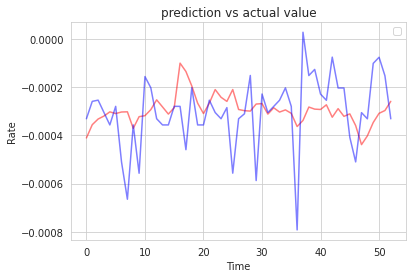

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(actual,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()